In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pwd

'/home/mami/Maria/results/community-paper/src/method_comparison/compare_results'

In [2]:
# Read in the CellPhoneDB results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.

cpdb = pd.read_csv('../../../results/method_comparison/compare_results/CPDB/CPDB_results.csv', index_col=None)
cpdb = cpdb.fillna(0)
cpdb.set_index("interaction", inplace=True)

cpdb = pd.read_csv ('CPDB/CPDB_results.csv', index_col=None)
cpdb = cpdb.fillna(0)
cpdb.set_index("interaction", inplace=True)

In [3]:
# Read in the NicheNet results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.
nnet = pd.read_csv("NicheNet/NicheNet_results.csv")
nnet = nnet.fillna(0)
nnet.set_index("interaction", inplace=True)

In [4]:
community = pd.read_csv("community/community_results.csv")
community.rename(columns={"Unnamed: 0": "interaction"}, inplace=True)
community.set_index("interaction", inplace=True)

In [5]:
# Create a list of column names in the dataframe that contain the string "healthy"
healthy = [col for col in community.columns if 'healthy' in col]

# Create a list of column names in the dataframe that contain the string "AML"
AML = [col for col in community.columns if 'AML' in col]


In [6]:
# drop the raw if all the values are zero
def drop_zeros(df):
    return df.loc[~(df==0).all(axis=1)]

In [7]:
# Create two new dataframes by separating the `community` dataframe into case and control groups based on column names.
# `community_control` contains only the columns from `community` that contain the string "healthy",
# while `community_case` contains only the columns from `community` that contain the string "AML".

community_control=community[healthy]
community_control=drop_zeros(community_control)
community_case=community[AML]
community_case=drop_zeros(community_case)

In [8]:
# same step for NicheNet
nnet_control=nnet[healthy]
nnet_control=drop_zeros(nnet_control)
nnet_case=nnet[AML]
nnet_case=drop_zeros(nnet_case)

In [9]:
# same step for CellPhoneDB
cpdb_control=cpdb[healthy]
cpdb_control=drop_zeros(cpdb_control)
cpdb_case=cpdb[AML]
cpdb_case=drop_zeros(cpdb_case)

In [63]:
# get the list of interaction in the control group for CellPhoneDB
cpdb_control_interactions = cpdb_control.index.values.tolist()

In [64]:
# get the list of interaction in the control group for NicheNet
nnet_control_interactions = nnet_control.index.values.tolist()

In [65]:
community_control_interactions = community_control.index.values.tolist()

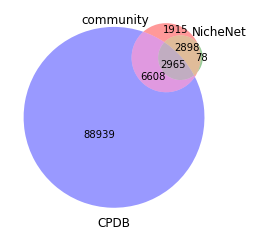

In [66]:
# plot the interactions in the control samples
venn3([set(community_control_interactions),set(nnet_control_interactions), set(cpdb_control_interactions)], ("community",'NicheNet', 'CPDB'))

In [67]:
cpdb_case_interactions = cpdb_case.index.values.tolist()
nnet_case_interactions = nnet_case.index.values.tolist()
community_case_interactions = community_case.index.values.tolist()

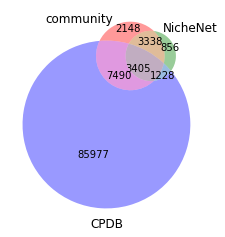

In [68]:
# plot the interactions in the case samples

venn3([set(community_case_interactions),set(nnet_case_interactions), set(cpdb_case_interactions)], ("community",'NicheNet', 'CPDB'))
plt.savefig('compare_case_interactions.png')

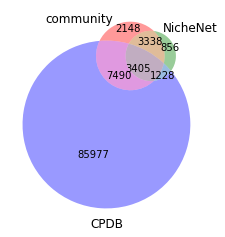

In [69]:
venn3([set(community_case_interactions),set(nnet_case_interactions), set(cpdb_case_interactions)], ("community",'NicheNet', 'CPDB'))

In [70]:
# just wanna get a quick glance at interactions that are in CPDB but not in community
not_in_commu=list(set(cpdb_case_interactions) - set(community_case_interactions))

In [71]:
cpdb_case[cpdb_case.index.isin(not_in_commu)]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340
interaction,,,,,,,
B:GNAS_B:ADRB2,0.438,0.0,0.369,0.488,0.000,0.000,0.518
B:GNAS_Ery:ADRB2,0.446,0.0,0.000,0.000,0.524,0.000,0.000
DC:GNAS_B:ADRB2,0.522,0.0,0.498,0.517,0.000,0.000,0.605
DC:GNAS_Ery:ADRB2,0.529,0.0,0.000,0.000,0.000,0.000,0.000
Ery:GNAS_B:ADRB2,0.360,0.0,0.316,0.324,0.000,0.000,0.000
...,...,...,...,...,...,...,...
Gran:COL4A5_NK:DDR2,0.000,0.0,0.000,0.007,0.000,0.000,0.000
HSPC:COL4A5_NK:DDR2,0.000,0.0,0.000,0.024,0.000,0.000,0.035
Gran:COL4A5_NK:CD47,0.000,0.0,0.000,0.259,0.000,0.000,0.000


In [72]:
# Below function 
# Standardizes the values in the dataframe by subtracting the mean and dividing by the standard deviation.
# Calculates the mean value of each row and adds it as a new column to the dataframe.
# Calculates the overall mean value of the mean column.
# Returns a new dataframe that includes only rows with mean values greater than the overall mean value.

def drop_low(df):
    # Standardize the values in the dataframe by subtracting the mean and dividing by the standard deviation
    df = (df - df.mean()) / df.std()
    
    # Calculate the mean value of each row and add it as a new column to the dataframe
    df['mean'] = df.mean(axis=1)
    
    # Calculate the overall mean value of the mean column
    mean_value = df['mean'].mean()
    
    # Return a new dataframe that includes only rows with mean values greater than the overall mean value
    return df[df['mean'] > mean_value]


In [73]:
# apply the function above
cpdb_case_norm=drop_low(cpdb_case)
nnet_case_norm=drop_low(nnet_case)
community_case_norm=drop_low(community_case)

In [74]:
cpdb_case_interactions = cpdb_case_norm.index.values.tolist()
nnet_case_interactions = nnet_case_norm.index.values.tolist()
community_case_interactions = community_case_norm.index.values.tolist()

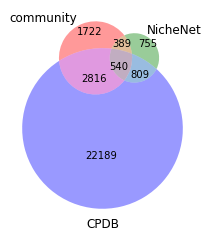

In [75]:
venn3([set(community_case_interactions),set(nnet_case_interactions), set(cpdb_case_interactions)], ("community",'NicheNet', 'CPDB'))
plt.savefig('compare_case_interactions_norm.png')


In [25]:
cpdb_case_norm=cpdb_case_norm.drop("mean", axis=1)

In [14]:
# Each column contains a list of two values: the number of interactions in the case group and the control group


plotdata = pd.DataFrame({

    "community":[len(community_case),len(community_control)],

    "NicheNet":[len(nnet_case),len(nnet_control)],

    "CPDB":[len(cpdb_case),len(cpdb_control)]},

    index=["case", "control"])

In [17]:
plotdata

,community,NicheNet,CPDB
case,16381,8827,98100
control,14386,6031,98602


Text(0, 0.5, '# of interactions')

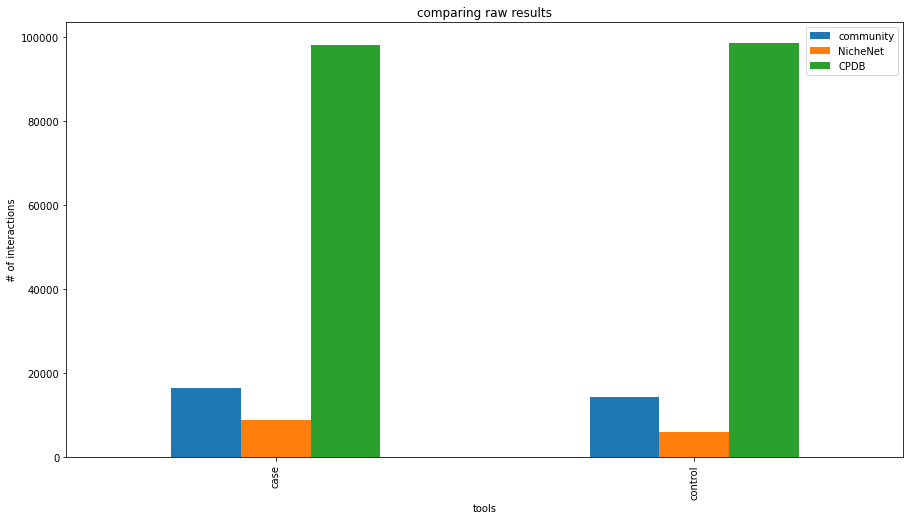

In [16]:
plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("comparing raw results")

plt.xlabel("tools")

plt.ylabel("# of interactions")